In [40]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from IPython.display import Image

import seaborn as sns
import matplotlib.pylab as plt

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [41]:
# 데이터 불러오기
df = pd.read_csv('방송통신위원회_해외방송시장조사_OTT 서비스 시청 시간_20220711.csv', encoding='euc-kr')
df.head()

,연번,조사연도,국가,분류,구분,사례수(명),30분미만(비율),30분이상-1시간미만(비율),1시간이상-2시간미만(비율),2시간이상-3시간미만(비율),3시간이상-4시간미만(비율),4시간이상-5시간미만(비율),5시간이상(비율),평균(분),시청콘텐츠,주말구분
0,1,2018,말레이시아,연령별,전체,192,6.3,16.7,29.7,21.9,16.7,4.2,4.7,NaN,NaN,NaN
1,2,2018,말레이시아,연령별,10대,36,2.8,22.2,22.2,27.8,11.1,5.6,8.3,NaN,NaN,NaN
2,3,2018,말레이시아,연령별,20대,48,10.4,10.4,33.3,27.1,14.6,2.1,2.1,NaN,NaN,NaN
3,4,2018,말레이시아,연령별,30대,45,4.4,8.9,31.1,22.2,15.6,8.9,8.9,NaN,NaN,NaN
4,5,2018,말레이시아,연령별,40대,44,2.3,25.0,29.5,13.6,25.0,2.3,2.3,NaN,NaN,NaN


In [42]:
# 각 국가별로 데이터를 필터링하여 새로운 데이터프레임 생성
brazil = df.query("국가=='브라질'").reset_index(drop=True)
india = df.query("국가=='인도'").reset_index(drop=True)
turkiye = df.query("국가=='터키'").reset_index(drop=True)
uk = df.query("국가=='영국'").reset_index(drop=True)
canada = df.query("국가=='캐나다'").reset_index(drop=True)

brazil.head()

,연번,조사연도,국가,분류,구분,사례수(명),30분미만(비율),30분이상-1시간미만(비율),1시간이상-2시간미만(비율),2시간이상-3시간미만(비율),3시간이상-4시간미만(비율),4시간이상-5시간미만(비율),5시간이상(비율),평균(분),시청콘텐츠,주말구분
0,137,2020,브라질,국가별,전체,368,12.8,1.6,14.7,35.1,20.4,4.1,11.4,146.1,방송프로그램,주중
1,145,2020,브라질,성별,남성,185,9.7,2.2,14.6,37.8,17.8,4.9,13.0,150.7,방송프로그램,주중
2,146,2020,브라질,성별,여성,183,15.8,1.1,14.8,32.2,23.0,3.3,9.8,141.4,방송프로그램,주중
3,164,2020,브라질,연령별,10대,48,12.5,6.3,14.6,29.2,22.9,2.1,12.5,143.2,방송프로그램,주중
4,165,2020,브라질,연령별,20대,65,3.1,1.5,15.4,38.5,24.6,3.1,13.8,160.0,방송프로그램,주중


In [43]:
# 사용하지 않는 column 삭제
brazil= brazil.drop(['연번','조사연도','국가','사례수(명)','평균(분)'], axis=1)
india = india.drop(['연번','조사연도','국가','사례수(명)','평균(분)'], axis=1)
turkiye = turkiye.drop(['연번','조사연도','국가','사례수(명)','평균(분)'], axis=1)
uk = uk.drop(['연번','조사연도','국가','사례수(명)','평균(분)'], axis=1)
canada = canada.drop(['연번','조사연도','국가','사례수(명)','평균(분)'], axis=1)

brazil.head()

,분류,구분,30분미만(비율),30분이상-1시간미만(비율),1시간이상-2시간미만(비율),2시간이상-3시간미만(비율),3시간이상-4시간미만(비율),4시간이상-5시간미만(비율),5시간이상(비율),시청콘텐츠,주말구분
0,국가별,전체,12.8,1.6,14.7,35.1,20.4,4.1,11.4,방송프로그램,주중
1,성별,남성,9.7,2.2,14.6,37.8,17.8,4.9,13.0,방송프로그램,주중
2,성별,여성,15.8,1.1,14.8,32.2,23.0,3.3,9.8,방송프로그램,주중
3,연령별,10대,12.5,6.3,14.6,29.2,22.9,2.1,12.5,방송프로그램,주중
4,연령별,20대,3.1,1.5,15.4,38.5,24.6,3.1,13.8,방송프로그램,주중


In [44]:
# '국가별' 분류에 해당하는 데이터만 필터링하여 새로운 데이터프레임 생성
brazil_n = brazil.query("분류=='국가별'").reset_index(drop=True)
india_n = india.query("분류=='국가별'").reset_index(drop=True)
turkiye_n = turkiye.query("분류=='국가별'").reset_index(drop=True)
uk_n = uk.query("분류=='국가별'").reset_index(drop=True)
canada_n = canada.query("분류=='국가별'").reset_index(drop=True)

brazil_n

,분류,구분,30분미만(비율),30분이상-1시간미만(비율),1시간이상-2시간미만(비율),2시간이상-3시간미만(비율),3시간이상-4시간미만(비율),4시간이상-5시간미만(비율),5시간이상(비율),시청콘텐츠,주말구분
0,국가별,전체,12.8,1.6,14.7,35.1,20.4,4.1,11.4,방송프로그램,주중
1,국가별,전체,10.3,1.1,8.2,23.1,15.2,12.5,29.6,방송프로그램,주말
2,국가별,전체,13.6,0.8,16.0,25.0,23.6,11.7,9.2,동영상콘텐츠,주중
3,국가별,전체,13.3,1.4,10.1,16.3,39.9,19.0,0.0,동영상콘텐츠,주말


In [45]:
# 분석하기 좋은 형태로 변환
brazil_n = brazil_n.melt(id_vars=['분류','구분','시청콘텐츠','주말구분'])
brazil_n.columns=['분류','구분','시청콘텐츠','주말구분', '시청시간','비율']

india_n = india_n.melt(id_vars=['분류','구분','시청콘텐츠','주말구분'])
india_n.columns=['분류','구분','시청콘텐츠','주말구분', '시청시간','비율']

turkiye_n = turkiye_n.melt(id_vars=['분류','구분','시청콘텐츠','주말구분'])
turkiye_n.columns=['분류','구분','시청콘텐츠','주말구분', '시청시간','비율']

uk_n = uk_n.melt(id_vars=['분류','구분','시청콘텐츠','주말구분'])
uk_n.columns=['분류','구분','시청콘텐츠','주말구분', '시청시간','비율']

canada_n = canada_n.melt(id_vars=['분류','구분','시청콘텐츠','주말구분'])
canada_n.columns=['분류','구분','시청콘텐츠','주말구분', '시청시간','비율']

brazil_n.head()

,분류,구분,시청콘텐츠,주말구분,시청시간,비율
0,국가별,전체,방송프로그램,주중,30분미만(비율),12.8
1,국가별,전체,방송프로그램,주말,30분미만(비율),10.3
2,국가별,전체,동영상콘텐츠,주중,30분미만(비율),13.6
3,국가별,전체,동영상콘텐츠,주말,30분미만(비율),13.3
4,국가별,전체,방송프로그램,주중,30분이상-1시간미만(비율),1.6


In [46]:
# '시청콘텐츠'가 '방송프로그램'인 데이터를 필터링
# '시청콘텐츠'가 '동영상콘텐츠'인 데이터를 필터링

brazil_n_b= brazil_n.loc[brazil_n['시청콘텐츠']=='방송프로그램']
brazil_n_v = brazil_n.loc[brazil_n['시청콘텐츠']=='동영상콘텐츠']

uk_n_b= uk_n.loc[uk_n['시청콘텐츠']=='방송프로그램']
uk_n_v = uk_n.loc[uk_n['시청콘텐츠']=='동영상콘텐츠']

brazil_n_v

,분류,구분,시청콘텐츠,주말구분,시청시간,비율
2,국가별,전체,동영상콘텐츠,주중,30분미만(비율),13.6
3,국가별,전체,동영상콘텐츠,주말,30분미만(비율),13.3
6,국가별,전체,동영상콘텐츠,주중,30분이상-1시간미만(비율),0.8
7,국가별,전체,동영상콘텐츠,주말,30분이상-1시간미만(비율),1.4
10,국가별,전체,동영상콘텐츠,주중,1시간이상-2시간미만(비율),16.0
11,국가별,전체,동영상콘텐츠,주말,1시간이상-2시간미만(비율),10.1
14,국가별,전체,동영상콘텐츠,주중,2시간이상-3시간미만(비율),25.0
15,국가별,전체,동영상콘텐츠,주말,2시간이상-3시간미만(비율),16.3
18,국가별,전체,동영상콘텐츠,주중,3시간이상-4시간미만(비율),23.6
19,국가별,전체,동영상콘텐츠,주말,3시간이상-4시간미만(비율),39.9


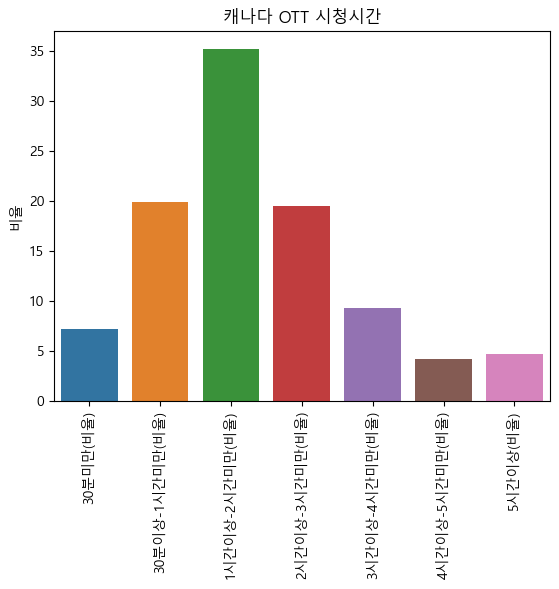

In [52]:
#캐나다 OTT 시청시간
sns.barplot(x=canada_n['시청시간'], y=canada_n['비율'])
plt.xticks(rotation=90)
plt.title('캐나다 OTT 시청시간')
plt.xlabel('')
plt.show()

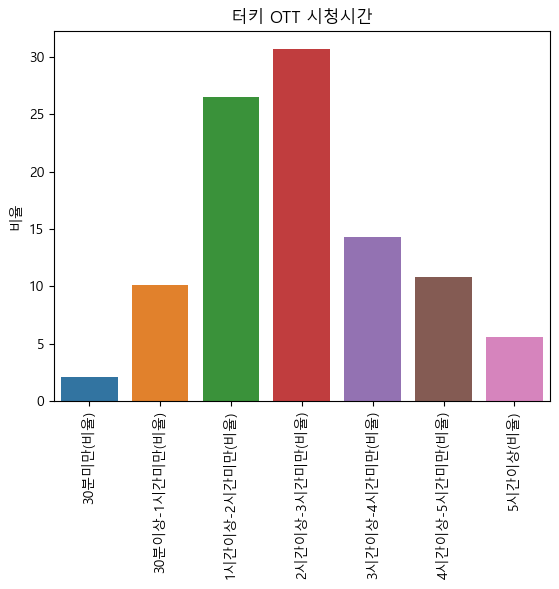

In [53]:
#터기 OTT 시청시간
sns.barplot(x=turkiye_n['시청시간'], y=turkiye_n['비율'])
plt.xticks(rotation=90)
plt.title('터키 OTT 시청시간')
plt.xlabel('')
plt.show()

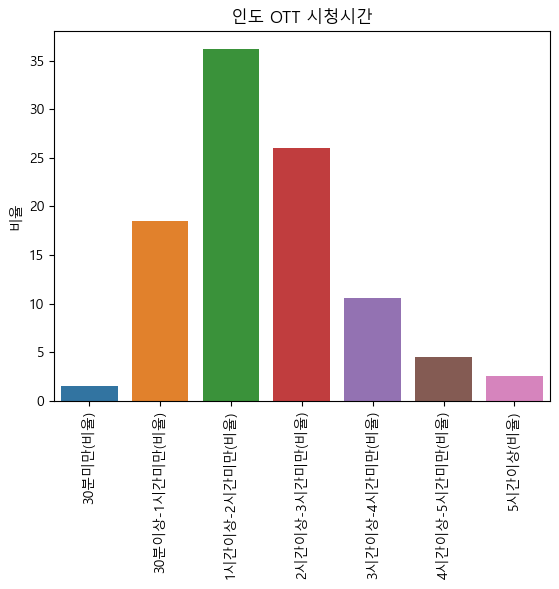

In [58]:
#인도 OTT 시청시간
sns.barplot(x=india_n['시청시간'], y=india_n['비율'])
plt.xticks(rotation=90)
plt.title('인도 OTT 시청시간')
plt.xlabel('')
plt.show()

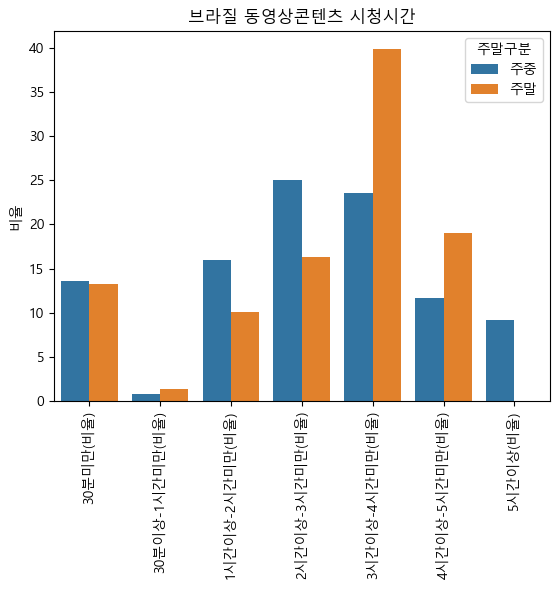

In [60]:
#브라질 동영상콘텐츠 시청시간
sns.barplot(x=brazil_n_v['시청시간'], y=brazil_n_v['비율'], hue=brazil_n_v['주말구분'])
plt.xticks(rotation=90)
plt.title('브라질 동영상콘텐츠 시청시간')
plt.xlabel('')
plt.show()

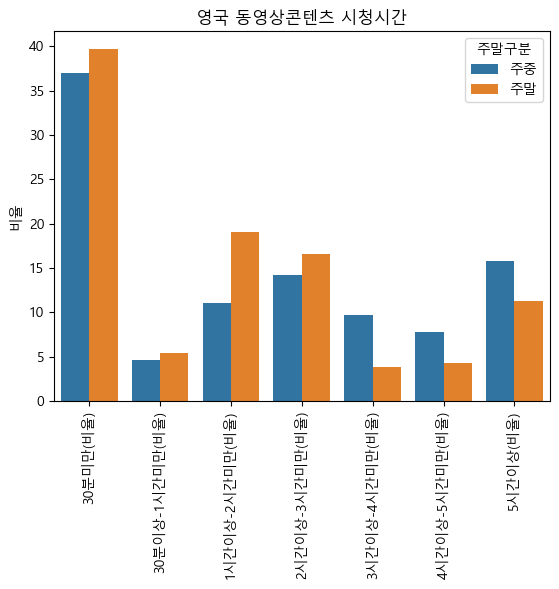

In [61]:
#영국 동영상콘텐츠 시청시간
sns.barplot(x=uk_n_v['시청시간'], y=uk_n_v['비율'], hue=uk_n_v['주말구분'])
plt.xticks(rotation=90)
plt.title('영국 동영상콘텐츠 시청시간')
plt.xlabel('')
plt.show()